In [414]:
import pandas as pd

rhks = pd.read_csv('/Users/ijunhui/Downloads/ubion/프로젝트2/4_텍스트분석/관리_뉴스_기사비율_기간분할.csv')
wjd_1 = pd.read_csv('/Users/ijunhui/Downloads/ubion/프로젝트2/3_크롤링전처리/정상/뉴스/2017정상기업크롤링전처리.csv')
wjd_2 = pd.read_csv('/Users/ijunhui/Downloads/ubion/프로젝트2/3_크롤링전처리/정상/뉴스/2019정상기업크롤링전처리.csv')
wjd = pd.read_csv('/Users/ijunhui/Downloads/ubion/프로젝트2/4_텍스트분석/정상_뉴스_기사비율_기간분할.csv')
wjd1 = pd.read_csv('/Users/ijunhui/Downloads/ubion/프로젝트2/4_텍스트분석/정상_뉴스_train_기사비율_기간분할.csv')
wjd2 = pd.read_csv('/Users/ijunhui/Downloads/ubion/프로젝트2/4_텍스트분석/정상_뉴스_test_기사비율_기간분할.csv')

In [415]:
len(wjd)

7931

In [416]:
train_2017 = (rhks['기간끝'] <= '2019-03-31')
df_train_2017 = rhks.loc[train_2017]
test_2019 = (rhks['기간끝'] > '2019-03-31')
df_test_2019 = rhks.loc[test_2019]

In [417]:
df_train_2017 = df_train_2017.set_index('종목명')
df_test_2019 = df_test_2019.set_index('종목명')
df_train_2017 = df_train_2017.reset_index()
df_test_2019 = df_test_2019.reset_index()

In [418]:
rhks = rhks.drop_duplicates()
wjd = wjd.drop_duplicates()
wjd1 = wjd1.drop_duplicates()
wjd2 = wjd2.drop_duplicates()


In [419]:
rhks = rhks.drop('Unnamed: 0', axis=1)
wjd = wjd.drop('Unnamed: 0', axis=1)
wjd1 = wjd1.drop('Unnamed: 0', axis=1)
wjd2 = wjd2.drop('Unnamed: 0', axis=1)
df_train_2017 = df_train_2017.drop('Unnamed: 0', axis=1)
df_test_2019 = df_test_2019.drop('Unnamed: 0', axis=1)



In [422]:
wjd['전체'] = wjd['제목'] + wjd['본문']
rhks['전체'] = rhks['제목'] + rhks['본문']
df_train_2017['전체'] = df_train_2017['제목'] + df_train_2017['본문']
df_test_2019['전체'] = df_test_2019['제목'] + df_test_2019['본문']
wjd_1['전체'] = wjd_1['제목'] + wjd_1['본문']
wjd_2['전체'] = wjd_2['제목'] + wjd_2['본문']
wjd1['전체'] = wjd1['제목'] + wjd1['본문']
wjd2['전체'] = wjd2['제목'] + wjd2['본문']

In [423]:
rhks['label'] = 0
wjd['label'] = 0
wjd_1['label'] = 0
wjd_2['label'] = 0
wjd1['label'] = 0
wjd2['label'] = 0
df_train_2017['label'] = 0
df_test_2019['label'] = 0
# 기본 'label' 키워드가 포함된 기사 = 1

In [424]:
# 추출된 키워드
keyword = ['관리종목','관리','정사유', '미달', '우려', '지정', '자본잠식', '이자보' ,'불성', '리스크', '공적자금', '부실','워크아웃','위기','자금난']
# 키워드가 포함된 기사수(관리기업 키워드 기사 수) = b
# 'label'에 1 부여
k_w = '|'.join(keyword)
k_w
rhks['label'][rhks['전체'].str.contains(k_w)] = 1
wjd['label'][wjd['전체'].str.contains(k_w)] = 1
wjd_1['label'][wjd_1['전체'].str.contains(k_w)] = 1
wjd_2['label'][wjd_2['전체'].str.contains(k_w)] = 1
wjd1['label'][wjd1['전체'].str.contains(k_w)] = 1
wjd2['label'][wjd2['전체'].str.contains(k_w)] = 1

df_train_2017['label'][df_train_2017['전체'].str.contains(k_w)] = 1
df_test_2019['label'][df_test_2019['전체'].str.contains(k_w)] = 1



/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_28255/824296994.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rhks['label'][rhks['전체'].str.contains(k_w)] = 1
/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_28255/824296994.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wjd['label'][wjd['전체'].str.contains(k_w)] = 1
/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_28255/824296994.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [425]:
keyword = ['관리종목','정사유', '미달', '우려', '지정', '자본잠식', '이자보' ,'불성', '리스크', '공적자금', '부실','워크아웃','위기','자금난']
tf_list = []
# 기사내에서 키워드의 개수 확인 = TF
for i in range(0, len(df_train_2017)):
        sum_w = 0
        for j in keyword:
                cnt = df_train_2017.loc[i]['전체'].count(j)
                sum_w += cnt
                df_train_2017.loc[i, 'TF'] = sum_w     

In [426]:
keyword = ['관리종목','정사유', '미달', '우려', '지정', '자본잠식', '이자보' ,'불성', '리스크', '공적자금', '부실','워크아웃','위기','자금난']
tf_list = []
for i in range(0, len(df_test_2019)):
        sum_w = 0
        for j in keyword:
                cnt = df_test_2019.loc[i]['전체'].count(j)
                sum_w += cnt
                df_test_2019.loc[i, 'TF'] = sum_w     

In [427]:
keyword = ['관리종목','정사유', '미달', '우려', '지정', '자본잠식', '이자보' ,'불성', '리스크', '공적자금', '부실','워크아웃','위기','자금난']
tf_list = []
for i in range(0, len(rhks)):
        sum_w = 0
        for j in keyword:
                cnt = rhks.loc[i]['전체'].count(j)
                sum_w += cnt
                rhks.loc[i, 'TF'] = sum_w     

In [428]:
keyword = ['관리종목','정사유', '미달', '우려', '지정', '자본잠식', '이자보' ,'불성', '리스크', '공적자금', '부실','워크아웃','위기','자금난']
tf_list = []
for i in range(0, len(wjd2)):
        sum_w = 0
        for j in keyword:
                cnt = wjd2.loc[i]['전체'].count(j)
                sum_w += cnt
                wjd2.loc[i, 'TF'] = sum_w     

In [429]:
keyword = ['관리종목','정사유', '미달', '우려', '지정', '자본잠식', '이자보' ,'불성', '리스크', '공적자금', '부실','워크아웃','위기','자금난']
tf_list = []
for i in range(0, len(wjd1)):
        sum_w = 0
        for j in keyword:
                cnt = wjd1.loc[i]['전체'].count(j)
                sum_w += cnt
                wjd1.loc[i, 'TF'] = sum_w  

In [430]:
keyword = ['관리종목','정사유', '미달', '우려', '지정', '자본잠식', '이자보' ,'불성', '리스크', '공적자금', '부실','워크아웃','위기','자금난']
tf_list = []
for i in range(0, len(wjd_1)):
        sum_w = 0
        for j in keyword:
                cnt = wjd_1.loc[i]['전체'].count(j)
                sum_w += cnt
                wjd_1.loc[i, 'TF'] = sum_w   

In [431]:
keyword = ['관리종목','정사유', '미달', '우려', '지정', '자본잠식', '이자보' ,'불성', '리스크', '공적자금', '부실','워크아웃','위기','자금난']
tf_list = []
for i in range(0, len(wjd_2)):
        sum_w = 0
        for j in keyword:
                cnt = wjd_2.loc[i]['전체'].count(j)
                sum_w += cnt
                wjd_2.loc[i, 'TF'] = sum_w

In [432]:
for i in range(0, len(rhks)):
    if rhks.loc[i]['label'] == 0:
        rhks.loc[i,'1mon'] = 0
        rhks.loc[i,'2mon'] = 0
        rhks.loc[i,'3mon'] = 0
        rhks.loc[i,'4mon'] = 0
        rhks.loc[i,'5mon'] = 0
        rhks.loc[i,'6mon'] = 0
# 만약 'label'=0 즉 키워드가 포함된 기사가 아니면 1~6월 카운트가 되면 안됨(뒤늦게 발견)
    

In [433]:
for i in range(0, len(wjd1)):
    if wjd1.loc[i]['label'] == 0:
        wjd1.loc[i,'1mon'] = 0
        wjd1.loc[i,'2mon'] = 0
        wjd1.loc[i,'3mon'] = 0
        wjd1.loc[i,'4mon'] = 0
        wjd1.loc[i,'5mon'] = 0
        wjd1.loc[i,'6mon'] = 0

    

In [434]:
for i in range(0, len(wjd2)):
    if wjd2.loc[i]['label'] == 0:
        wjd2.loc[i,'1mon'] = 0
        wjd2.loc[i,'2mon'] = 0
        wjd2.loc[i,'3mon'] = 0
        wjd2.loc[i,'4mon'] = 0
        wjd2.loc[i,'5mon'] = 0
        wjd2.loc[i,'6mon'] = 0

    

In [435]:
for i in range(0, len(wjd)):
    if wjd.loc[i]['label'] == 0:
        wjd.loc[i,'1mon'] = 0
        wjd.loc[i,'2mon'] = 0
        wjd.loc[i,'3mon'] = 0
        wjd.loc[i,'4mon'] = 0
        wjd.loc[i,'5mon'] = 0
        wjd.loc[i,'6mon'] = 0

    

In [436]:
train_2017 = (rhks['기간끝'] <= '2019-03-31')
df_train_2017 = rhks.loc[train_2017]
test_2019 = (rhks['기간끝'] > '2019-03-31')
df_test_2019 = rhks.loc[test_2019]

In [437]:
df_train_2017

,종목명,신문사,시간,제목,본문,기간시작,gg1,gg2,gg3,gg4,...,기간끝,1mon,2mon,3mon,4mon,5mon,6mon,전체,label,TF
0,코다코,서울경제,2018-10-02,"<코>코다코, 장중 신저가 기록.. 2,320→2,260(▼60)","[서울경제] 오후 12시 33분 현재 코다코(046070)가 3.83% 내린 2,2...",2018-09-21,2018-10-21,2018-11-21,2018-12-21,2019-01-21,...,2019-03-21,0,0,0,0,0,0,"<코>코다코, 장중 신저가 기록.. 2,320→2,260(▼60)[서울경제] 오후 ...",0,0.0
1,코다코,서울경제,2018-10-04,"<코>코다코, 장중 신저가 기록.. 2,255→2,180(▼75)","[서울경제] 오전 11시 25분 현재 코다코(046070)가 4.39% 내린 2,1...",2018-09-21,2018-10-21,2018-11-21,2018-12-21,2019-01-21,...,2019-03-21,0,0,0,0,0,0,"<코>코다코, 장중 신저가 기록.. 2,255→2,180(▼75)[서울경제] 오전 ...",0,0.0
2,코다코,전자신문,2018-10-12,"[ET투자뉴스][코다코 지분 변동] 인귀승 외 4명 0.29%p 증가, 15.6% 보유",코다코(046070)는 12일 최대주주 인귀승을 비롯한 특별관계자의 보유주식이 증가...,2018-09-21,2018-10-21,2018-11-21,2018-12-21,2019-01-21,...,2019-03-21,0,0,0,0,0,0,"[ET투자뉴스][코다코 지분 변동] 인귀승 외 4명 0.29%p 증가, 15.6% ...",0,0.0
3,코다코,전자신문,2018-10-19,"[ET투자뉴스][코다코 지분 변동] 인귀승 외 4명 0.07%p 증가, 15.67% 보유",코다코(046070)는 19일 최대주주 인귀승을 비롯한 특별관계자의 보유주식이 증가...,2018-09-21,2018-10-21,2018-11-21,2018-12-21,2019-01-21,...,2019-03-21,0,0,0,0,0,0,"[ET투자뉴스][코다코 지분 변동] 인귀승 외 4명 0.07%p 증가, 15.67%...",0,0.0
4,코다코,서울경제,2018-10-25,"<코>코다코, 장중 신저가 기록.. 2,010→1,960(▼50)","[서울경제] 오후 2시 47분 현재 코다코(046070)가 4.85% 내린 1,96...",2018-09-21,2018-10-21,2018-11-21,2018-12-21,2019-01-21,...,2019-03-21,0,0,0,0,0,0,"<코>코다코, 장중 신저가 기록.. 2,010→1,960(▼50)[서울경제] 오후 ...",0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17634,미스터피자,이데일리,2018-04-14,[포토]캠퍼들 환호성 자아내는 미스터피자 드림팀,[이데일리 방인권 기자] 미스터피자 드림팀이 14일 오후 경기 가평군 자라섬 캠핑장...,2018-02-15,2018-03-15,2018-04-15,2018-05-15,2018-06-15,...,2018-08-14,0,0,0,0,0,0,[포토]캠퍼들 환호성 자아내는 미스터피자 드림팀[이데일리 방인권 기자] 미스터피자 ...,0,0.0
17635,미스터피자,이데일리,2018-04-14,[포토]렛츠 고 캠핑 찾은 미스터피자 드림팀,[이데일리 방인권 기자] 미스터피자 드림팀이 14일 오후 경기 가평군 자라섬 캠핑장...,2018-02-15,2018-03-15,2018-04-15,2018-05-15,2018-06-15,...,2018-08-14,0,0,0,0,0,0,[포토]렛츠 고 캠핑 찾은 미스터피자 드림팀[이데일리 방인권 기자] 미스터피자 드림...,0,0.0
17636,미스터피자,이데일리,2018-04-14,"[포토]미스터피자 드림팀, '환상의 도우쇼'",[이데일리 방인권 기자] 미스터피자 드림팀이 14일 오후 경기 가평군 자라섬 캠핑장...,2018-02-15,2018-03-15,2018-04-15,2018-05-15,2018-06-15,...,2018-08-14,0,0,0,0,0,0,"[포토]미스터피자 드림팀, '환상의 도우쇼'[이데일리 방인권 기자] 미스터피자 드림...",0,0.0
17637,미스터피자,이데일리,2018-04-14,[포토]미스터피자 드림팀의 화려한 무대,[이데일리 방인권 기자] 미스터피자 드림팀이 14일 오후 경기 가평군 자라섬 캠핑장...,2018-02-15,2018-03-15,2018-04-15,2018-05-15,2018-06-15,...,2018-08-14,0,0,0,0,0,0,[포토]미스터피자 드림팀의 화려한 무대[이데일리 방인권 기자] 미스터피자 드림팀이 ...,0,0.0


In [438]:
wjd1.loc[5576]

종목명                                                CJ프레시웨이
신문사                                                  머니투데이
시간                                              2017-10-18
제목                     CJ프레시웨이, 제조인프라 구축 통한 시장 선점 긍정적-삼성증권
본문       [머니투데이 이태성 기자]\n삼성증권은 18일 CJ프레시웨이에 대해 "제조 인프라 ...
기간시작                                            2017-09-30
gg1                                             2017-10-30
gg2                                             2017-11-30
gg3                                             2017-12-30
gg4                                             2018-01-30
gg5                                             2018-02-28
기간끝                                             2018-03-31
1mon                                                     1
2mon                                                     0
3mon                                                     0
4mon                                                     0
5mon                                                    

In [439]:
#종목당 기사수
wjd_news_cnt = wjd.groupby('종목명').count()
wjd_cnt = wjd.groupby('종목명').count()
rhks_news_cnt = rhks.groupby('종목명').count()
rhks_cnt = rhks.groupby('종목명').count()
wjd_1_news_cnt = wjd_1.groupby('종목명').count()
wjd_2_news_cnt = wjd_2.groupby('종목명').count()
wjd1_news_cnt = wjd1.groupby('종목명').count()
wjd2_news_cnt = wjd2.groupby('종목명').count()
train_2017_cnt = df_train_2017.groupby('종목명').count()
test_2019_cnt = df_test_2019.groupby('종목명').count()

# wjd_news_cnt['label'] = wjd_news_cnt['부도기사비율']

In [440]:
#종목당 부도 기사 수
wjd_label_sum = wjd.groupby('종목명').sum()
rhks_label_sum = rhks.groupby('종목명').sum()
wjd_1_label_sum = wjd_1.groupby('종목명').sum()
wjd_2_label_sum = wjd_2.groupby('종목명').sum()
wjd1_label_sum = wjd1.groupby('종목명').sum()
wjd2_label_sum = wjd2.groupby('종목명').sum()
train_2017_sum = df_train_2017.groupby('종목명').sum()
test_2019_sum = df_test_2019.groupby('종목명').sum()

In [441]:
# 전체 기사 수 = 관리기업 기사 + 정상 기업 기사 = all_cnt = 25570
# 관리기업 기사 수 : rhks_news_cnt : 17639
# 정상기업 기사 수 : wjd_news_cnt : 7931
# 관리기업 수 : rhks_cnt : 226
# 정상기업 수 : wjd_cnt : 191

# 관리기업 관리기사 비율 : 3830 / 17639 : 21.71%

# 정상기업 관리기사 비율 : 44 / 7931 : 0.55%

# 정상 train(2017) 기사수 :  / 7015 : 13.51%
# test(2019) 기사수 :  / 1605 : 8.2%

In [442]:
wjd2[wjd2['TF'] == 1.0]

,종목명,신문사,시간,제목,본문,기간시작,gg1,gg2,gg3,gg4,...,기간끝,1mon,2mon,3mon,4mon,5mon,6mon,전체,label,TF
62,글로벌텍스프리,뉴시스,2019-12-11,"유안타證 ""글로벌텍스프리, 내년 다양한 방면 실적 개선 기대""","투자의견, 목표가 제시 안해\n[서울=뉴시스] 글로벌텍스프리\n[서울=뉴시스] 강수...",2019-09-30,2019-10-30,2019-11-30,2019-12-30,2020-01-30,...,2020-03-31,0,0,1,0,0,0,"유안타證 ""글로벌텍스프리, 내년 다양한 방면 실적 개선 기대""투자의견, 목표가 제시...",1,1.0
63,글로벌텍스프리,한국경제,2019-12-11,"글로벌텍스프리, 4분기 최대 매출 경신 전망…""성장 이어질 것""",유안타증권은 11일 글로벌텍스프리의 성장세가 이어질 것으로 전망했다. 글로벌텍스프리...,2019-09-30,2019-10-30,2019-11-30,2019-12-30,2020-01-30,...,2020-03-31,0,0,1,0,0,0,"글로벌텍스프리, 4분기 최대 매출 경신 전망…""성장 이어질 것""유안타증권은 11일 ...",1,1.0
87,바이오솔루션,파이낸셜뉴스,2019-10-16,제이콘텐트리 이전상장에… 바이오솔루션 '미소',12월 정기변경 앞둔 코스닥150\n신규편입 유력 종목으로 관심\n매수세 몰리며 주...,2019-09-30,2019-10-30,2019-11-30,2019-12-30,2020-01-30,...,2020-03-31,1,0,0,0,0,0,제이콘텐트리 이전상장에… 바이오솔루션 '미소'12월 정기변경 앞둔 코스닥150\n신...,1,1.0
499,덕산네오룩스,이데일리,2019-11-09,"[주목!e스몰캡]덕산네오룩스, 폴더블·5G폰 개화로 매출 다변화",정공수송층 등 OLED 소재 전문기업\nOLED 보편화 빨라지며 소재 수요 증가세\...,2019-09-30,2019-10-30,2019-11-30,2019-12-30,2020-01-30,...,2020-03-31,0,1,0,0,0,0,"[주목!e스몰캡]덕산네오룩스, 폴더블·5G폰 개화로 매출 다변화정공수송층 등 OLE...",1,1.0
627,이노와이어리스,헤럴드경제,2019-10-21,"5G 이노와이어리스, 1년만에 KCGI에 '효자' 노릇",지분 매입에 따른 평가 이익 122억\n1년 전 인수 CB 전환시 이익 123억\n...,2019-09-30,2019-10-30,2019-11-30,2019-12-30,2020-01-30,...,2020-03-31,1,0,0,0,0,0,"5G 이노와이어리스, 1년만에 KCGI에 '효자' 노릇지분 매입에 따른 평가 이익 ...",1,1.0
628,이노와이어리스,헤럴드경제,2019-10-21,KCGI 투자 1년만에 효자된 이노와이어리스,지분매입 따른 평가 이익 122억\n130억 CB 전환시 128억 차익도\n5세대 ...,2019-09-30,2019-10-30,2019-11-30,2019-12-30,2020-01-30,...,2020-03-31,1,0,0,0,0,0,KCGI 투자 1년만에 효자된 이노와이어리스지분매입 따른 평가 이익 122억\n13...,1,1.0
646,나노,아시아경제,2019-10-01,"나노메딕스, 스탠다드그래핀 투자 완료…""해외 성과 가시화에 따라 그래핀 양산 본격화""",[아시아경제 유현석 기자] 나노메딕스는 스탠다드그래핀에 전환사채 50억원 납입을 완...,2019-09-30,2019-10-30,2019-11-30,2019-12-30,2020-01-30,...,2020-03-31,1,0,0,0,0,0,"나노메딕스, 스탠다드그래핀 투자 완료…""해외 성과 가시화에 따라 그래핀 양산 본격화...",1,1.0
647,나노,머니투데이,2019-10-01,"나노메딕스, 스탠다드그래핀 투자 완료 ""그래핀 양산 본격화""","[머니투데이 김건우 기자] [150억원 전환사채 투자 완료, 주식으로 전환할 경우 ...",2019-09-30,2019-10-30,2019-11-30,2019-12-30,2020-01-30,...,2020-03-31,1,0,0,0,0,0,"나노메딕스, 스탠다드그래핀 투자 완료 ""그래핀 양산 본격화""[머니투데이 김건우 기자...",1,1.0
649,나노,파이낸셜뉴스,2019-10-01,"나노메딕스, 스탠다드그래핀 투자 완료…해외 성과 가시화",[파이낸셜뉴스] 나노메딕스가 스탠다드그래핀의 추가 투자를 완료해 대주주 지위 확보를...,2019-09-30,2019-10-30,2019-11-30,2019-12-30,2020-01-30,...,2020-03-31,1,0,0,0,0,0,"나노메딕스, 스탠다드그래핀 투자 완료…해외 성과 가시화[파이낸셜뉴스] 나노메딕스가 ...",1,1.0
803,램테크놀러지,매일경제,2019-10-07,하이닉스에 불화수소 공급…램테크놀러지 뒤늦게 `방긋`,반도체 소재 국산화 수혜\n이달들어 46% 주가 급등\n\n램테크놀러지가 반도체 소...,2019-09-30,2019-10-30,2019-11-30,2019-12-30,2020-01-30,...,2020-03-31,1,0,0,0,0,0,하이닉스에 불화수소 공급…램테크놀러지 뒤늦게 `방긋`반도체 소재 국산화 수혜\n이달...,1,1.0


In [443]:
wjd_all = wjd_cnt['전체'].sum() # 7931

wjs_1mon = wjd_label_sum['1mon'].sum() # 23
wjs_2mon = wjd_label_sum['2mon'].sum() # 7
wjs_3mon = wjd_label_sum['3mon'].sum() # 11
wjs_4mon = wjd_label_sum['4mon'].sum() # 1
wjs_5mon = wjd_label_sum['5mon'].sum() # 0
wjs_6mon = wjd_label_sum['6mon'].sum() # 2

wjs_mon1 = (wjs_1mon / wjd_all) * 100
wjs_mon2 = (wjs_2mon / wjd_all) * 100
wjs_mon3 = (wjs_3mon / wjd_all) * 100
wjs_mon4 = (wjs_4mon / wjd_all) * 100
wjs_mon5 = (wjs_5mon / wjd_all) * 100
wjs_mon6 = (wjs_6mon / wjd_all) * 100

rhks_all = rhks_cnt['전체'].sum() #17639
rhks_1mon = rhks_label_sum['1mon'].sum() # 374
rhks_2mon = rhks_label_sum['2mon'].sum() # 493
rhks_3mon = rhks_label_sum['3mon'].sum() # 406
rhks_4mon = rhks_label_sum['4mon'].sum() # 459
rhks_5mon = rhks_label_sum['5mon'].sum() # 774
rhks_6mon = rhks_label_sum['6mon'].sum() # 1324

rhks_mon1 = (rhks_1mon / rhks_all) * 100
rhks_mon2 = (rhks_2mon / rhks_all) * 100
rhks_mon3 = (rhks_3mon / rhks_all) * 100
rhks_mon4 = (rhks_4mon / rhks_all) * 100
rhks_mon5 = (rhks_5mon / rhks_all) * 100
rhks_mon6 = (rhks_6mon / rhks_all) * 100

wjs_6mon

205

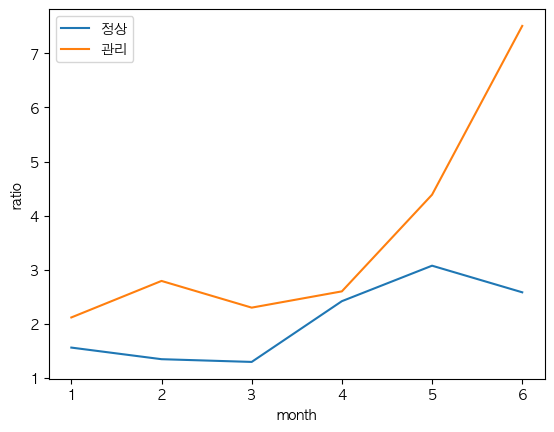

In [444]:
from matplotlib import pyplot as plt
from matplotlib import rc 
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.plot([1, 2, 3, 4, 5, 6], [wjs_mon1, wjs_mon2, wjs_mon3, wjs_mon4, wjs_mon5, wjs_mon6])
plt.plot([1, 2, 3, 4, 5, 6], [rhks_mon1, rhks_mon2, rhks_mon3, rhks_mon4, rhks_mon5, rhks_mon6])
plt.xlabel('month')
plt.ylabel('ratio')
plt.legend(['정상', '관리'])
plt.show()

# 월별 관리 키워드 포함 기사수 추이

In [445]:
rhks_mon1+rhks_mon2+rhks_mon3+rhks_mon4+rhks_mon5+rhks_mon6

21.713249050399686

In [446]:
wjs_mon1+wjs_mon2+wjs_mon3+wjs_mon4+wjs_mon5+wjs_mon6

12.29353171100744

In [447]:
train_2017_sum

,1mon,2mon,3mon,4mon,5mon,6mon,label,TF
종목명,,,,,,,,
CSA 코스믹,12,9,2,1,6,0,30,50.0
EMW,2,0,7,2,1,0,12,11.0
KCW,0,0,0,0,0,2,2,0.0
KD,0,0,0,0,0,0,0,0.0
SK컴즈,15,8,0,2,31,5,61,294.0
...,...,...,...,...,...,...,...,...
해덕파워웨이,8,5,5,0,0,0,18,26.0
현진소재,0,0,0,0,0,0,0,0.0
협진,4,5,2,0,5,3,19,6.0


In [448]:
# 부도기사 비율
wjd_news_cnt['부도기사비율'] = wjd_label_sum['label'] / wjd_news_cnt['label'] * 100
rhks_news_cnt['부도기사비율'] = rhks_label_sum['label'] / rhks_news_cnt['label'] * 100
wjd1_news_cnt['부도기사비율'] = wjd1_label_sum['label'] / wjd1_news_cnt['label'] * 100
wjd2_news_cnt['부도기사비율'] = wjd2_label_sum['label'] / wjd2_news_cnt['label'] * 100
train_2017_cnt['부도기사비율'] = train_2017_sum['label'] / train_2017_cnt['label'] * 100
test_2019_cnt['부도기사비율'] = test_2019_sum['label'] / test_2019_cnt['label'] * 100

# 월별 부도 기사 비율
train_2017_cnt['1m_ratio'] = (train_2017_sum['1mon'] / train_2017_cnt['1mon']) * 100
train_2017_cnt['2m_ratio'] = (train_2017_sum['2mon'] / train_2017_cnt['2mon']) * 100
train_2017_cnt['3m_ratio'] = (train_2017_sum['3mon'] / train_2017_cnt['3mon']) * 100
train_2017_cnt['4m_ratio'] = (train_2017_sum['4mon'] / train_2017_cnt['4mon']) * 100
train_2017_cnt['5m_ratio'] = (train_2017_sum['5mon'] / train_2017_cnt['5mon']) * 100
train_2017_cnt['6m_ratio'] = (train_2017_sum['6mon'] / train_2017_cnt['6mon']) * 100

test_2019_cnt['1m_ratio'] = (test_2019_sum['1mon'] / test_2019_cnt['1mon']) * 100
test_2019_cnt['2m_ratio'] = (test_2019_sum['2mon'] / test_2019_cnt['2mon']) * 100
test_2019_cnt['3m_ratio'] = (test_2019_sum['3mon'] / test_2019_cnt['3mon']) * 100
test_2019_cnt['4m_ratio'] = (test_2019_sum['4mon'] / test_2019_cnt['4mon']) * 100
test_2019_cnt['5m_ratio'] = (test_2019_sum['5mon'] / test_2019_cnt['5mon']) * 100
test_2019_cnt['6m_ratio'] = (test_2019_sum['6mon'] / test_2019_cnt['6mon']) * 100


wjd_news_cnt['1m_ratio'] = (wjd_label_sum['1mon'] / wjd_news_cnt['1mon']) * 100
wjd_news_cnt['2m_ratio'] = (wjd_label_sum['2mon'] / wjd_news_cnt['2mon']) * 100
wjd_news_cnt['3m_ratio'] = (wjd_label_sum['3mon'] / wjd_news_cnt['3mon']) * 100
wjd_news_cnt['4m_ratio'] = (wjd_label_sum['4mon'] / wjd_news_cnt['4mon']) * 100
wjd_news_cnt['5m_ratio'] = (wjd_label_sum['5mon'] / wjd_news_cnt['5mon']) * 100
wjd_news_cnt['6m_ratio'] = (wjd_label_sum['6mon'] / wjd_news_cnt['6mon']) * 100

rhks_news_cnt['1m_ratio'] = (rhks_label_sum['1mon'] / rhks_news_cnt['1mon']) * 100
rhks_news_cnt['2m_ratio'] = (rhks_label_sum['2mon'] / rhks_news_cnt['2mon']) * 100
rhks_news_cnt['3m_ratio'] = (rhks_label_sum['3mon'] / rhks_news_cnt['3mon']) * 100
rhks_news_cnt['4m_ratio'] = (rhks_label_sum['4mon'] / rhks_news_cnt['4mon']) * 100
rhks_news_cnt['5m_ratio'] = (rhks_label_sum['5mon'] / rhks_news_cnt['5mon']) * 100
rhks_news_cnt['6m_ratio'] = (rhks_label_sum['6mon'] / rhks_news_cnt['6mon']) * 100


wjd1_news_cnt['1m_ratio'] = (wjd1_label_sum['1mon'] / wjd1_news_cnt['1mon']) * 100
wjd1_news_cnt['2m_ratio'] = (wjd1_label_sum['2mon'] / wjd1_news_cnt['2mon']) * 100
wjd1_news_cnt['3m_ratio'] = (wjd1_label_sum['3mon'] / wjd1_news_cnt['3mon']) * 100
wjd1_news_cnt['4m_ratio'] = (wjd1_label_sum['4mon'] / wjd1_news_cnt['4mon']) * 100
wjd1_news_cnt['5m_ratio'] = (wjd1_label_sum['5mon'] / wjd1_news_cnt['5mon']) * 100
wjd1_news_cnt['6m_ratio'] = (wjd1_label_sum['6mon'] / wjd1_news_cnt['6mon']) * 100


wjd2_news_cnt['1m_ratio'] = (wjd2_label_sum['1mon'] / wjd2_news_cnt['1mon']) * 100
wjd2_news_cnt['2m_ratio'] = (wjd2_label_sum['2mon'] / wjd2_news_cnt['2mon']) * 100
wjd2_news_cnt['3m_ratio'] = (wjd2_label_sum['3mon'] / wjd2_news_cnt['3mon']) * 100
wjd2_news_cnt['4m_ratio'] = (wjd2_label_sum['4mon'] / wjd2_news_cnt['4mon']) * 100
wjd2_news_cnt['5m_ratio'] = (wjd2_label_sum['5mon'] / wjd2_news_cnt['5mon']) * 100
wjd2_news_cnt['6m_ratio'] = (wjd2_label_sum['6mon'] / wjd2_news_cnt['6mon']) * 100


train_2017_cnt['TF'] = train_2017_sum['TF']
test_2019_cnt['TF'] = test_2019_sum['TF']

wjd1_news_cnt['TF'] = wjd1_label_sum['TF']
wjd2_news_cnt['TF'] = wjd2_label_sum['TF']



In [449]:
wjd_news_cnt = wjd_news_cnt.reset_index()
rhks_news_cnt = rhks_news_cnt.reset_index()

wjd_1_news_cnt = wjd_1_news_cnt.reset_index()
wjd_2_news_cnt = wjd_2_news_cnt.reset_index()
wjd1_news_cnt = wjd1_news_cnt.reset_index()
wjd2_news_cnt = wjd2_news_cnt.reset_index()

train_2017_cnt = train_2017_cnt.reset_index()
test_2019_cnt = test_2019_cnt.reset_index()


In [450]:
wjd_news_cnt

,종목명,신문사,시간,제목,본문,기간시작,gg1,gg2,gg3,gg4,...,6mon,전체,label,부도기사비율,1m_ratio,2m_ratio,3m_ratio,4m_ratio,5m_ratio,6m_ratio
0,CJ프레시웨이,56,56,56,56,56,56,56,56,56,...,56,56,56,32.142857,14.285714,17.857143,0.000000,0.0,0.000000,0.000000
1,CMG제약,32,32,32,32,32,32,32,32,32,...,32,32,32,9.375000,0.000000,6.250000,3.125000,0.0,0.000000,0.000000
2,ITX엠투엠,28,28,28,28,28,28,28,28,28,...,28,28,28,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,JW신약,45,45,45,45,45,45,45,45,45,...,45,45,45,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,TJ미디어,18,18,18,18,18,18,18,18,18,...,18,18,18,5.555556,5.555556,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,휴비츠,49,49,49,49,49,49,49,49,49,...,49,49,49,2.040816,0.000000,0.000000,0.000000,0.0,2.040816,0.000000
187,휴온스,19,19,19,19,19,19,19,19,19,...,19,19,19,36.842105,36.842105,0.000000,0.000000,0.0,0.000000,0.000000
188,흥국에프엔비,24,24,24,24,24,24,24,24,24,...,24,24,24,4.166667,0.000000,0.000000,0.000000,0.0,0.000000,4.166667
189,희림,21,21,21,21,21,21,21,21,21,...,21,21,21,19.047619,9.523810,4.761905,4.761905,0.0,0.000000,0.000000


In [451]:
wjd_news_cnt = wjd_news_cnt[['종목명','부도기사비율', '1m_ratio', '2m_ratio', '3m_ratio', '4m_ratio', '5m_ratio', '6m_ratio']]
wjd1_news_cnt = wjd1_news_cnt[['종목명','부도기사비율', '1m_ratio', '2m_ratio', '3m_ratio', '4m_ratio', '5m_ratio', '6m_ratio', 'TF']]
wjd2_news_cnt = wjd2_news_cnt[['종목명','부도기사비율', '1m_ratio', '2m_ratio', '3m_ratio', '4m_ratio', '5m_ratio', '6m_ratio', 'TF']]
rhks_news_cnt = rhks_news_cnt[['종목명','부도기사비율', '1m_ratio', '2m_ratio', '3m_ratio', '4m_ratio', '5m_ratio', '6m_ratio', 'TF']]
train_2017_cnt = train_2017_cnt[['종목명','부도기사비율', '1m_ratio', '2m_ratio', '3m_ratio', '4m_ratio', '5m_ratio', '6m_ratio', 'TF']]
test_2019_cnt = test_2019_cnt[['종목명','부도기사비율', '1m_ratio', '2m_ratio', '3m_ratio', '4m_ratio', '5m_ratio', '6m_ratio', 'TF']]

In [452]:
rhks_label_sum

,1mon,2mon,3mon,4mon,5mon,6mon,label,TF
종목명,,,,,,,,
CSA 코스믹,12,9,2,1,6,0,30,50.0
EMW,2,0,7,2,1,0,12,11.0
KCW,0,0,0,0,0,2,2,0.0
KD,0,0,0,0,0,0,0,0.0
SK컴즈,15,8,0,2,31,5,61,294.0
...,...,...,...,...,...,...,...,...
현진소재,0,0,0,0,0,0,0,0.0
협진,4,5,2,0,5,3,19,6.0
화신테크,0,4,4,0,1,0,9,47.0


In [453]:
rhks_news_cnt

,종목명,부도기사비율,1m_ratio,2m_ratio,3m_ratio,4m_ratio,5m_ratio,6m_ratio,TF
0,CSA 코스믹,60.000000,24.000000,18.000000,4.000000,2.000000,12.000000,0.000000,50
1,EMW,17.647059,2.941176,0.000000,10.294118,2.941176,1.470588,0.000000,68
2,KCW,5.714286,0.000000,0.000000,0.000000,0.000000,0.000000,5.714286,35
3,KD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
4,SK컴즈,25.102881,6.172840,3.292181,0.000000,0.823045,12.757202,2.057613,243
...,...,...,...,...,...,...,...,...,...
221,현진소재,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47
222,협진,61.290323,12.903226,16.129032,6.451613,0.000000,16.129032,9.677419,31
223,화신테크,4.687500,0.000000,2.083333,2.083333,0.000000,0.520833,0.000000,192
224,화진,15.000000,2.000000,7.000000,1.000000,5.000000,0.000000,0.000000,100


In [454]:
wjd1_news_cnt

,종목명,부도기사비율,1m_ratio,2m_ratio,3m_ratio,4m_ratio,5m_ratio,6m_ratio,TF
0,CJ프레시웨이,32.142857,14.285714,17.857143,0.000000,0.0,0.000000,0.00,37.0
1,CMG제약,9.375000,0.000000,6.250000,3.125000,0.0,0.000000,0.00,6.0
2,ITX엠투엠,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0
3,JW신약,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0
4,TJ미디어,5.555556,5.555556,0.000000,0.000000,0.0,0.000000,0.00,1.0
...,...,...,...,...,...,...,...,...,...
147,한양디지텍,12.500000,6.250000,0.000000,0.000000,0.0,0.000000,6.25,1.0
148,휴맥스홀딩스,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0
149,휴메딕스,32.352941,2.941176,1.470588,27.941176,0.0,0.000000,0.00,1.0
150,휴비츠,2.040816,0.000000,0.000000,0.000000,0.0,2.040816,0.00,1.0


In [455]:
wjd2_news_cnt

,종목명,부도기사비율,1m_ratio,2m_ratio,3m_ratio,4m_ratio,5m_ratio,6m_ratio,TF
0,글로벌텍스프리,12.500000,0.000000,0.000000,12.500000,0.000000,0.0,0.000000,4.0
1,금강철강,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,나노,18.750000,18.750000,0.000000,0.000000,0.000000,0.0,0.000000,3.0
3,녹십자셀,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,뉴인텍,5.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.0
5,덕산네오룩스,4.347826,0.000000,4.347826,0.000000,0.000000,0.0,0.000000,1.0
6,덕산테코피아,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
7,디알젬,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
8,램테크놀러지,2.631579,2.631579,0.000000,0.000000,0.000000,0.0,0.000000,1.0
9,메드팩토,5.952381,0.000000,1.190476,4.761905,0.000000,0.0,0.000000,4.0


In [461]:
train_2017_cnt.to_csv('관리뉴스_train_기사비율.csv', index=False)

In [462]:
test_2019_cnt.to_csv('관리뉴스_test_기사비율.csv', index = False)

In [463]:
wjd1_news_cnt.to_csv('정상뉴스_trian_기사비율.csv', index=False)

In [464]:
wjd2_news_cnt.to_csv('정상뉴스_test_기사비율.csv', index=False)